In [1]:
from gaussians import Gaussian

In [2]:
import torch

from matplotlib import pyplot as plt
import numpy as np

In [3]:
from ubvi import UBVI

In [4]:
example_log_pdf_0 = lambda x: -((x - 1) ** 2).sum(dim=-1) / 2

In [5]:
example_log_pdf_1 = lambda x: -torch.log(1 + (x ** 2).sum(dim=-1))

In [6]:
example_log_pdf_2 = lambda x: -(x[:, 0] - x[:, 1]) ** 2 / 2 - (x[:, 1] + x[:, 0]) ** 2 / (2 * 2 ** 2)

In [7]:
example_log_pdf_3 = lambda x: -x[:, 0] ** 2 / 200 - (x[:, 1] + 0.1 * x[:, 0] ** 2 - 100 * 0.1) ** 2 / 2

In [8]:
test = UBVI(example_log_pdf_1, Gaussian(1), num_opt_steps=5000, n_samples=1000, n_init=500, init_inflation=100)

In [ ]:
test.build(12)

Initializing component 11... 
          Iteration           |          Best param          |        Best objective        
             499              |  tensor([-0.0930,  0.0000])  |       tensor(-0.4543)        
Initialization of component 1 complete, x0 = tensor([-0.0930,  0.0000])
Optimizing component 1... 
Optimization of component 1 complete
Updating weights...
tensor([[1.0000e+00, 3.5055e-01, 8.5505e-02, 3.9688e-02, 6.7699e-01, 5.4193e-02,
         2.3467e-03, 8.2452e-03, 2.9342e-01, 5.9565e-01, 4.9839e-02],
        [3.5055e-01, 1.0000e+00, 4.0566e-01, 3.0518e-01, 5.5978e-01, 2.0410e-01,
         3.6614e-01, 2.9292e-01, 5.6788e-01, 1.5045e-01, 5.6073e-01],
        [8.5505e-02, 4.0566e-01, 1.0000e+00, 9.8990e-05, 7.0674e-01, 1.0170e-04,
         5.4450e-06, 1.4293e-05, 3.2372e-02, 1.4712e-02, 2.9038e-03],
        [3.9688e-02, 3.0518e-01, 9.8990e-05, 1.0000e+00, 1.5545e-01, 5.7462e-01,
         2.9374e-01, 8.4547e-01, 6.7663e-01, 2.0073e-04, 2.7005e-01],
        [6.7699e-01, 5.5

/Users/ybiktairov/Documents/Skoltech/Sk_Bayes/project/UBVI/source/ubvi.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  log_denom = 0.5 * torch.log(1. - torch.exp(torch.tensor(2 * lgh)))


             499              |  tensor([-0.8729,  4.4735])  |        tensor(0.8313)        
Initialization of component 2 complete, x0 = tensor([-0.8729,  4.4735], grad_fn=<CatBackward>)
Optimizing component 2... 
Optimization of component 2 complete
Updating weights...
tensor([[1.0000, 0.3558],
        [0.3558, 1.0000]], grad_fn=<CopySlices>)
Weight update complete...
Component 2:
Hellinger Dist Sq: tensor(0.0292)
Params:{'mus': tensor([[ 0.0074],
        [-0.6027]]), 'sigmas': tensor([[  3.7783],
        [934.6337]])}
Weights: tensor([0.8304, 0.3352])
Initializing component 3... 
          Iteration           |          Best param          |        Best objective        
             499              |  tensor([ 0.2148, -0.8824])  |        tensor(1.2493)        
Initialization of component 3 complete, x0 = tensor([ 0.2148, -0.8824], grad_fn=<CatBackward>)
Optimizing component 3... 
Optimization of component 3 complete
Updating weights...
tensor([[1.0000, 0.3558, 0.5860],
        [0.

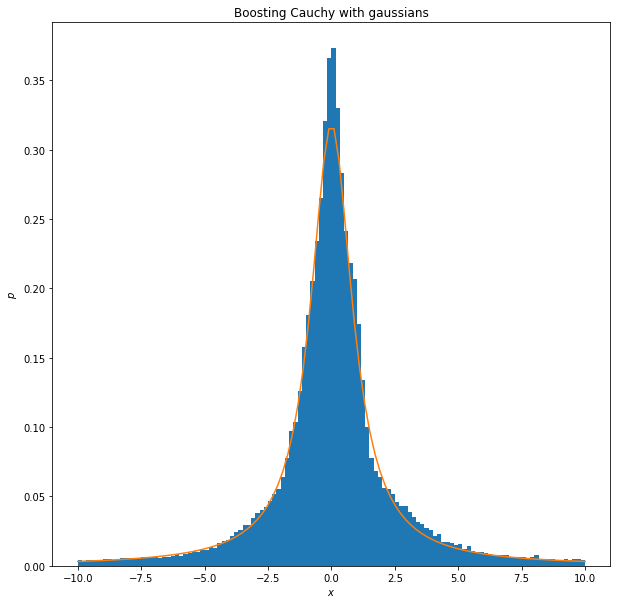

In [127]:
samples = test._sample_g(100000).detach().numpy().flatten()

plt.figure(figsize=(10, 10))

plt.hist(samples, density=True, bins=120, range=[-10, 10])

grid = np.linspace(-10, 10, 100)
plt.plot(grid, (1 / np.pi) / (1 + grid ** 2))

plt.title('Boosting Cauchy with gaussians')
plt.ylabel(r'$p$')
plt.xlabel(r'$x$')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


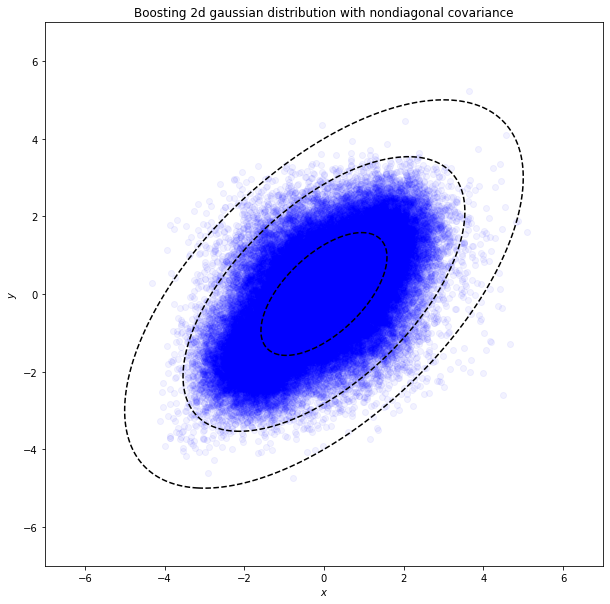

In [115]:
samples = test._sample_g(100000).detach().numpy()

plt.figure(figsize=(10, 10))

plt.scatter(samples[:, 0], samples[:, 1], c=(0, 0, 1, 0.05))


x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
plt.contour(X, Y, -(X - Y) ** 2 / 2 - (X + Y) ** 2 / (2 * 2 ** 2), [-10, -5, -1], colors='k')

plt.xlim([-7, 7])
plt.ylim([-7, 7])

# grid = np.linspace(-10, 10, 100)
# plt.plot(grid, (1 / np.pi) / (1 + grid ** 2))

plt.title('Boosting 2d gaussian distribution with nondiagonal covariance')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')

plt.show()

In [10]:
test_b = torch.tensor([2, 3])

In [11]:
test_b.expand_as(test_a)

tensor([[2, 3],
        [2, 3]])

In [10]:
torch.tensor(3, dtype=torch.float32)

tensor(3.)

In [15]:
test = torch.tensor([1., 2])

In [16]:
test.requires_grad

False

In [17]:
test.requires_grad_()

tensor([1., 2.], requires_grad=True)

In [18]:
test.requires_grad

True

In [8]:
x = torch.tensor([[1., 2], [2, 3]], requires_grad=True)

In [9]:
torch.optim.Adam([x])

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [9]:
x.dot(torch.Tensor([1, 2]))

RuntimeError: 1D tensors expected, got 2D, 1D tensors at ../aten/src/TH/generic/THTensorEvenMoreMath.cpp:774

In [10]:
test = torch.tensor([1, 2, 3])

In [13]:
torch.sum(test, dimsda=0)

TypeError: sum() received an invalid combination of arguments - got (Tensor, dimsda=int), but expected one of:
 * (Tensor input, torch.dtype dtype)
      didn't match because some of the keywords were incorrect: dimsda
 * (Tensor input, tuple of names dim, bool keepdim, torch.dtype dtype, Tensor out)
 * (Tensor input, tuple of ints dim, bool keepdim, torch.dtype dtype, Tensor out)
